# Supervised Learning Project

## Data Description:
 The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

## Domain:
Banking

## Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

## Attribute Information
a) ID: Customer ID <br />
b) Age: Customer age in years <br />
c) Experience: Years of professional experience <br />
d) Income: Annual Income of customers in dollars($000) <br />
e) CCAvg: Average spending on Credit Cards per month <br />
f) Zip Code: Home Address ZIP Code <br />
g) Family: Family size of customers <br />
h) Education: Education level <br />
            &emsp; 1) Undergrad <br />
            &emsp; 2) Graduate <br />
            &emsp; 3) Advanced/Professional <br />
i) Mortgage: Value of house mortgage if any <br />
j) Personal Loan: Did the customer accept the personal loan offered in the last campaign <br />
k) Security Account : Does the customer have security account with the bank <br />
l) CD Account: Does the customer have certifiacte of deposit (CD) account with the bank <br />
m) Online: Does the customer use internet banking facility <br />
n) Credit Card: Does the customer use credit card issued by Thera Bank


## Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.





In [20]:
#Loading required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import scikitplot as skplt
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [29]:
#Reading the data
tb=pd.read_csv("./Bank_Personal_Loan_Modelling.csv")

In [30]:
row, column = tb.shape
print('The dataset contains', row, 'rows and', column, 'columns')

The dataset contains 5000 rows and 14 columns


In [31]:
print('The data type of each attribute: \n')
tb.info()

The data type of each attribute: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [32]:
print('The data set has no missing values \n')
tb.isnull().sum()

The data set has no missing values 



ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [33]:
#glipmse of the data
tb.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [34]:
#5-point summary
tb.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [35]:
#Dropping ID and ZIP code
tb=tb.drop(["ID","ZIP Code"],axis=1)

## EDA

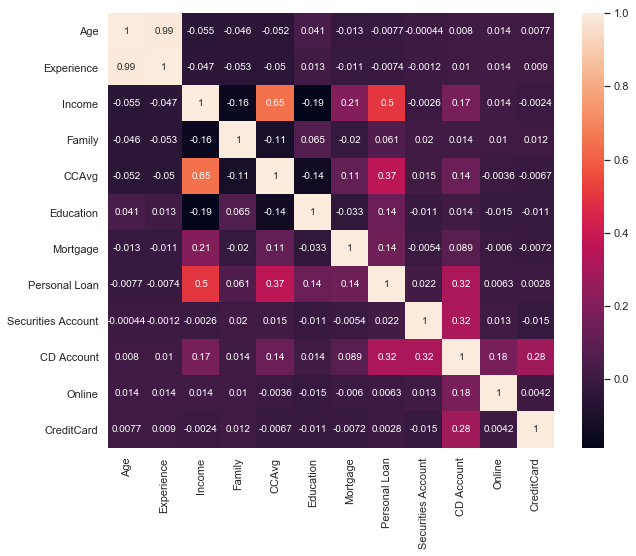

In [36]:
#checking for correlation
plt.figure(figsize=(10,8))
corr=tb.corr()
sns.heatmap(corr,annot=True);

Age and Experience are highly correlated which is quite intutive, will be dropping Experience from further analysis

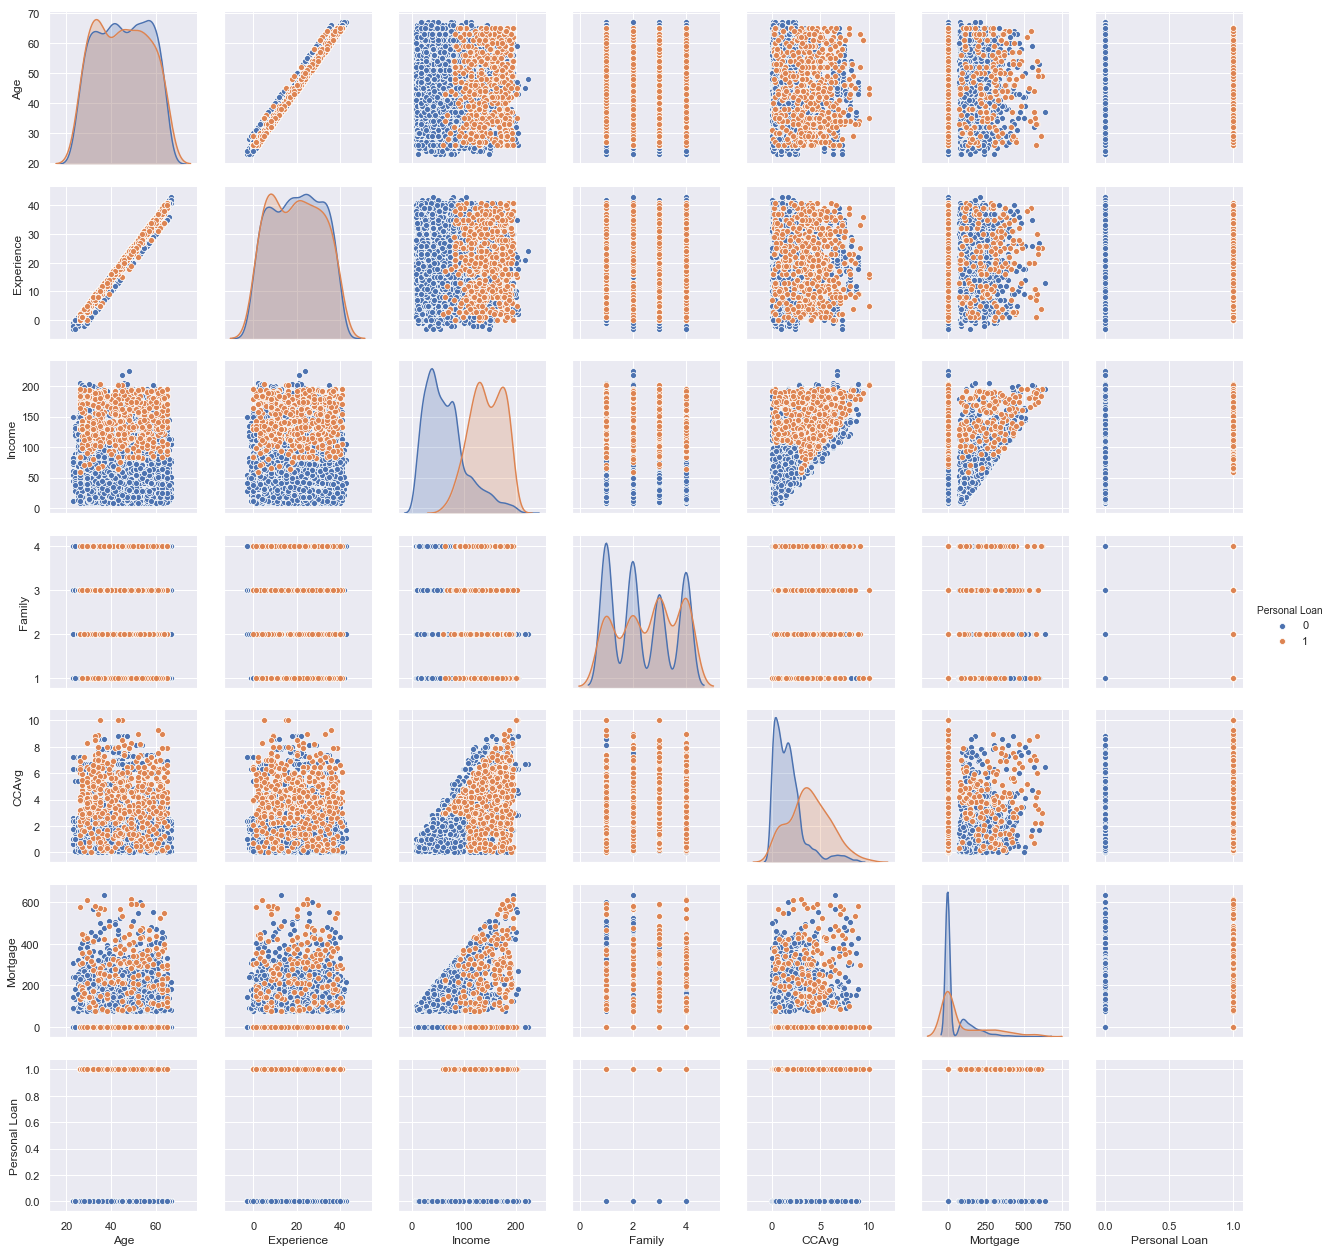

In [37]:
tb1 = tb[['Age','Experience','Income','Family','CCAvg','Mortgage','Personal Loan']]
sns.pairplot(tb1,diag_kind='kde',hue="Personal Loan");

1) Income is significantly diffrent for customer who have reponded positively in the previous campaign. <br />
2) Exepeience and Age have a strong linear realtionship

In [38]:
#Distribution of target variable
positive_response = len(tb.loc[tb['Personal Loan'] == 1])
negative_response = len(tb.loc[tb['Personal Loan'] == 0])
print("Number of positive responses: {0} ({1:2.2f}%)".format(positive_response, (positive_response / (positive_response + negative_response)) * 100 ))
print("Number of negative responses: {0} ({1:2.2f}%)".format(negative_response, (negative_response / (positive_response + negative_response)) * 100))

Number of positive responses: 480 (9.60%)
Number of negative responses: 4520 (90.40%)


There in an imbalance in the target variable

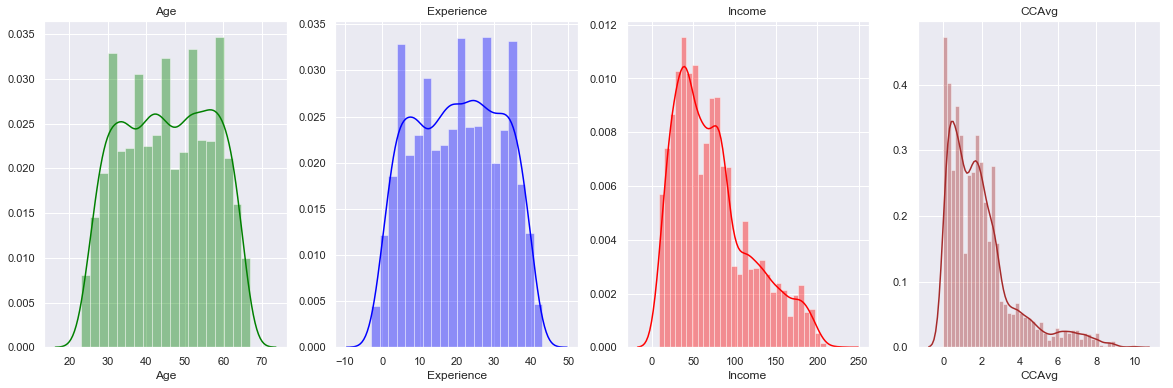

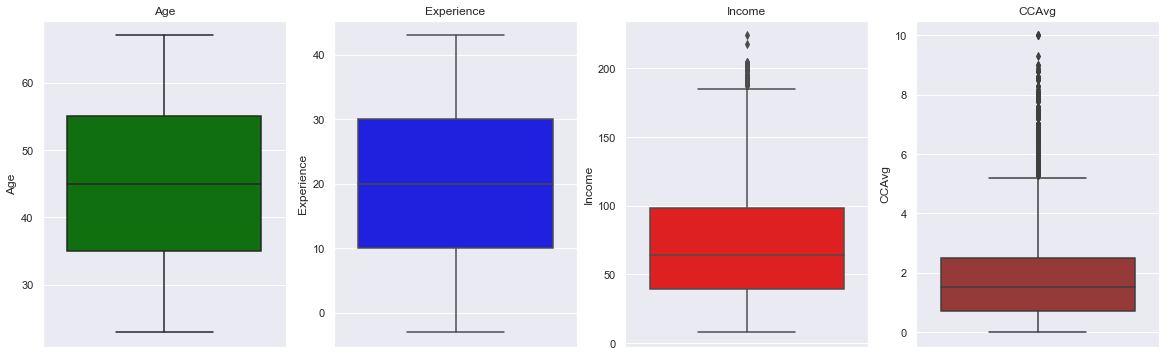

In [39]:
#Univariate analysis
plt.figure(figsize=(20,6))
plt.subplot(1, 4, 1)
plt.title('Age')
sns.distplot(tb['Age'],color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('Experience')
sns.distplot(tb['Experience'],color='blue')

# subplot 3l
plt.subplot(1, 4, 3)
plt.title('Income')
sns.distplot(tb['Income'],color='red')

# subplot 4l
plt.subplot(1, 4, 4)
plt.title('CCAvg')
sns.distplot(tb['CCAvg'],color='brown')

# subplot 1
plt.figure(figsize=(20,6))
plt.subplot(1, 4 ,1)
plt.title('Age')
sns.boxplot(tb['Age'],orient='vertical',color='green')

# subplot 2
plt.subplot(1, 4, 2)
plt.title('Experience')
sns.boxplot(tb['Experience'],orient='vertical',color='blue')

# subplot 3
plt.subplot(1, 4, 3)
plt.title('Income')
sns.boxplot(tb['Income'],orient='vertical',color='red')

# subplot 4
plt.subplot(1, 4, 4)
plt.title('CCAvg')
sns.boxplot(tb['CCAvg'],orient='vertical',color='brown')


plt.show()

1) CCAvg seems to be skewed to the right. <br />
2) Income and CCAvg have outliers 

In [40]:
#Preparing the data for further aanalysis, the Mortgage variable has been converted to binary variable( customers with/without mortgage)
tb['Family']= tb['Family'].astype('category')
tb['Education'] = tb['Education'].astype('category')
tb['Securities Account'] = tb['Securities Account'].astype('category')
tb['CD Account']=tb['CD Account'].astype('category')
tb['Online']=tb['Online'].astype('category')
tb['CreditCard']=tb['CreditCard'].astype('category')
tb['Personal Loan']=tb['Personal Loan'].astype('category')
tb['Mortgage_B'] = '-999'
tb.loc[(tb['Mortgage'] > 0), 'Mortgage_B'] = '1'
tb.loc[(tb['Mortgage'] == 0), 'Mortgage_B'] = '0'
tb=tb.drop(columns=['Mortgage'])
tb.rename(columns={'Mortgage_B':'Mortgage'}, inplace=True)
tb['Mortgage']=tb['Mortgage'].astype('category')

In [41]:
tb.dtypes.to_frame(name=" Data Type")

,Data Type
Age,int64
Experience,int64
Income,int64
Family,category
CCAvg,float64
Education,category
Personal Loan,category
Securities Account,category
CD Account,category
Online,category


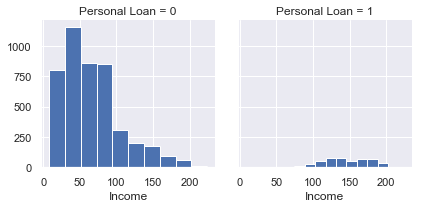

In [42]:
g=sns.FacetGrid(tb,col='Personal Loan')
g.map(plt.hist,'Income');

Customer who have responded postively in the previous camaping have their income is around 75k+

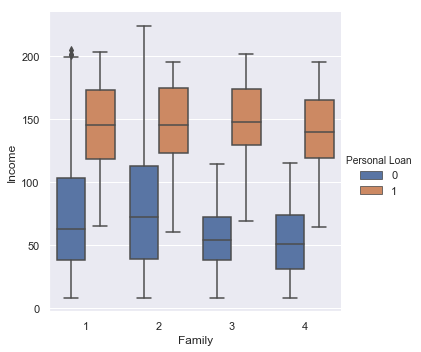

In [43]:
sns.catplot(x="Family", y="Income", kind="box",hue="Personal Loan", data=tb);

Income across size of family for customers who have responded postively in the previous campaingn is significantly different to those who have not responded.

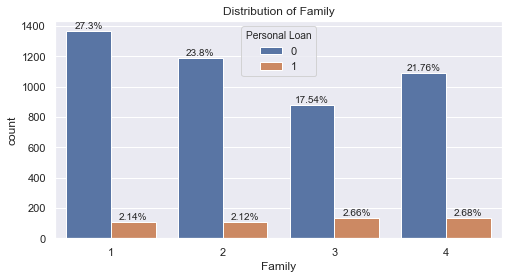

In [44]:
fig, ax = plt.subplots()
width = len(tb['Family'].unique()) + 4
fig.set_size_inches(width,4)
ax=sns.countplot(data = tb, x= 'Family',hue="Personal Loan")
plt.title('Distribution of Family')



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(tb)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

Positive Response rate across Family size is around 2%, with family size >=3 are more likely to respond postively

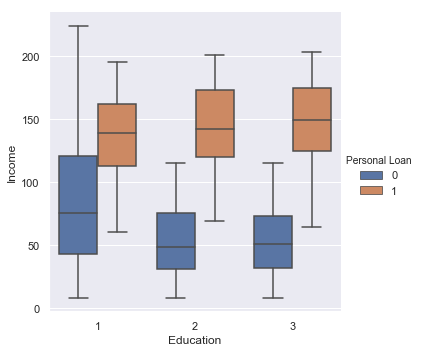

In [45]:
sns.catplot(x="Education", y="Income", kind="box",hue='Personal Loan', data=tb);

Income across Education level for customers who have responded postively in the previous campaingn is significantly different to those who have not responded.

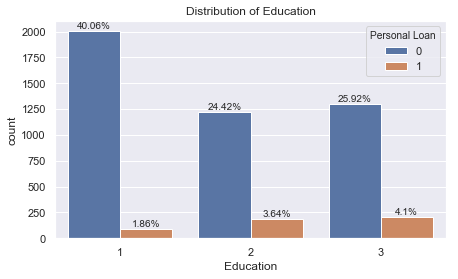

In [46]:
fig, ax = plt.subplots()
width = len(tb['Education'].unique()) + 4
fig.set_size_inches(width,4)
ax=sns.countplot(data = tb, x= 'Education',hue="Personal Loan")
plt.title('Distribution of Education')



for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(tb)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

Customer with and Education level of Graduate and Advance have higher response rate

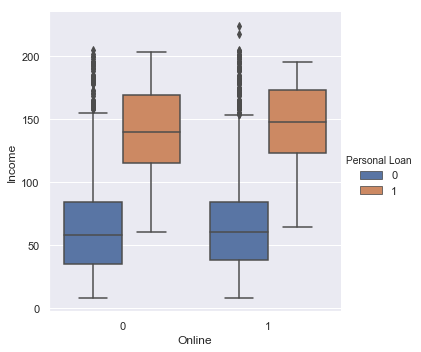

In [47]:
sns.catplot(x="Online", y="Income", kind="box",hue="Personal Loan", data=tb);

Income across customers having access to internet banking have responded postively in the previous campaingn is significantly different to those who have not responded.

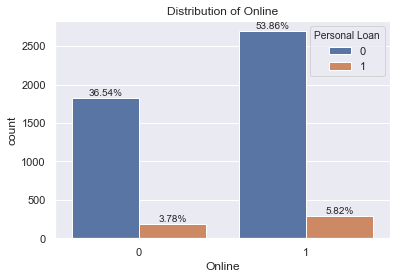

In [48]:
fig, ax = plt.subplots()
width = len(tb['Online'].unique()) + 4
fig.set_size_inches(width,4)
ax=sns.countplot(data = tb, x= 'Online',hue="Personal Loan") 
plt.title('Distribution of Online')


for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(tb)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

Customer having acess to internet banking are more likely to respond to the campaign

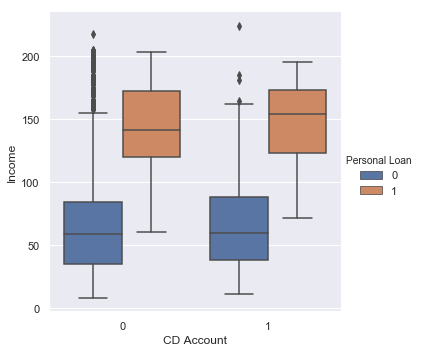

In [49]:
sns.catplot(x="CD Account", y="Income", kind="box",hue="Personal Loan", data=tb);

Income across customers who have a CD Account is significantly different from those who have responsed postively in the previous loan campaign compared to thos who haven't responded

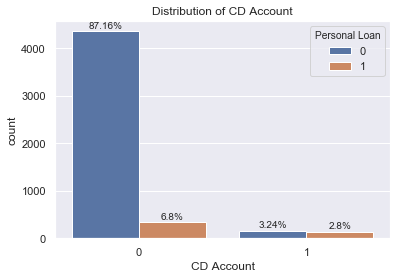

In [50]:
fig, ax = plt.subplots()
width = len(tb['CD Account'].unique()) + 4
fig.set_size_inches(width,4)
ax=sns.countplot(data = tb, x= 'CD Account',hue="Personal Loan")
plt.title('Distribution of CD Account')


for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(tb)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

Customer without a CD Account are more likely to respond postively to the campaign

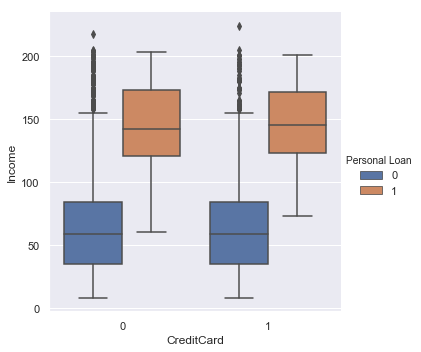

In [51]:
sns.catplot(x="CreditCard", y="Income", kind="box",hue="Personal Loan", data=tb);

Income across customers having Credit Card with Thera Bank who have responded positively is significatly different.

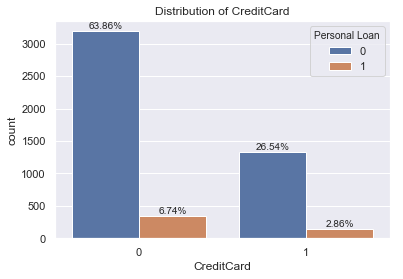

In [52]:
fig, ax = plt.subplots()
width = len(tb['CreditCard'].unique()) + 4
fig.set_size_inches(width,4)
ax=sns.countplot(data = tb, x= 'CreditCard',hue="Personal Loan") 
plt.title('Distribution of CreditCard')


for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(tb)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

Customer who do not hold a credit card provided by the bank are more likely to reponnd postively to the survey

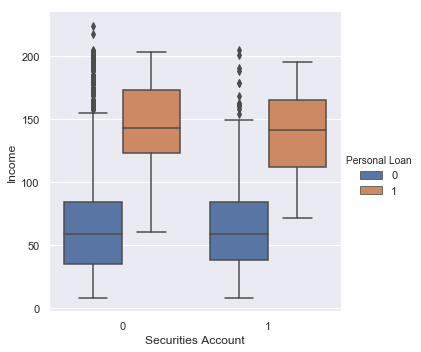

In [53]:
sns.catplot(x="Securities Account", y="Income", kind="box",hue="Personal Loan", data=tb);

Income across customer having securities account is significantly diffrent for customer who have responded postively in the previosu campaign

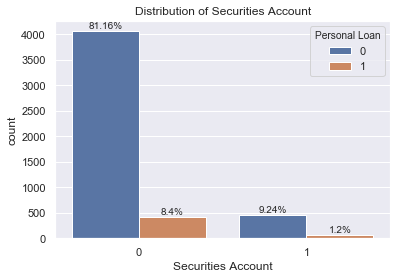

In [54]:
fig, ax = plt.subplots()
width = len(tb['Securities Account'].unique()) + 4
fig.set_size_inches(width,4)
ax=sns.countplot(data = tb, x= 'Securities Account',hue="Personal Loan") 
plt.title('Distribution of Securities Account')


for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(tb)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

Customer not having a securities account are more likely to respond positively

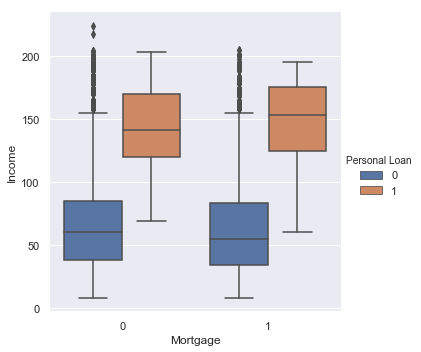

In [55]:
sns.catplot(x="Mortgage", y="Income", kind="box",hue="Personal Loan", data=tb);

Income across customer with a mortgage who have responded positively is significantly diffrent

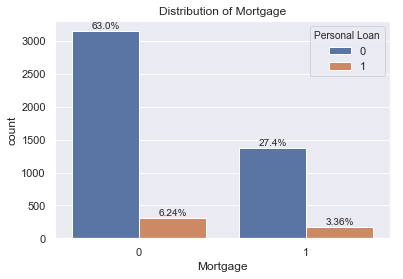

In [56]:
fig, ax = plt.subplots()
width = len(tb['Mortgage'].unique()) + 4
fig.set_size_inches(width,4)
ax=sns.countplot(data = tb, x= 'Mortgage',hue="Personal Loan") 
plt.title('Distribution of Mortgage')


for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(tb)*100,decimals=2)))+'%', (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

Customer without a mortgage are likely to respond positively

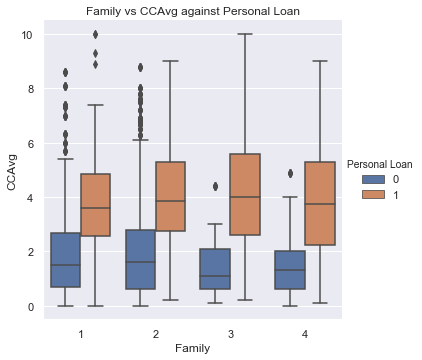

In [57]:
sns.catplot(x="Family", y="CCAvg", kind="box",hue="Personal Loan", data=tb);
plt.title('Family vs CCAvg against Personal Loan');

Average spending on credit card across customers family size is significantly difference for customers who have responded positively in the previous campaign

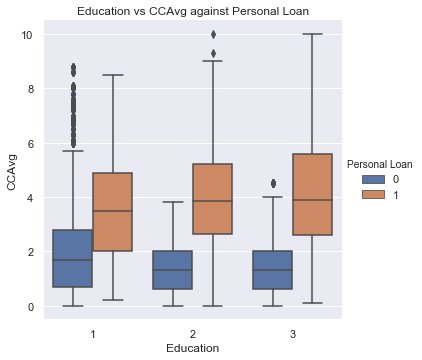

In [58]:
sns.catplot(x="Education", y="CCAvg", kind="box",hue="Personal Loan", data=tb);
plt.title('Education vs CCAvg against Personal Loan');

Average spending on credit card across Education is significantly different for customers who have responded in the previous campaign

## Logistic Regression

In [59]:
#Creating dummy variables
tb= pd.get_dummies(tb, prefix='Education', columns=['Education'])
tb= pd.get_dummies(tb, prefix='Family', columns=['Family'])

In [60]:
tb.head()

,Age,Experience,Income,CCAvg,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
0,25,1,49,1.6,0,1,0,0,0,0,1,0,0,0,0,0,1
1,45,19,34,1.5,0,1,0,0,0,0,1,0,0,0,0,1,0
2,39,15,11,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,35,9,100,2.7,0,0,0,0,0,0,0,1,0,1,0,0,0
4,35,8,45,1.0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [61]:
#Using Undergraduate and family size of 1 as reference for logistic regression
tb=tb.drop(["Education_1","Family_1"],axis=1)

In [62]:
# Function to calculate VIF( check if the new variable created a correlated)
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

X=tb.iloc[:,10:15]
calculate_vif(X)

,Var,Vif
3,Family_3,0.31
4,Family_4,0.22
1,Education_3,0.20
0,Education_2,0.13
2,Family_2,0.01


In [63]:
#Dropping Experience
tb=tb.drop(["Experience"],axis=1)

In [64]:
tb.head()

,Age,Income,CCAvg,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage,Education_2,Education_3,Family_2,Family_3,Family_4
0,25,49,1.6,0,1,0,0,0,0,0,0,0,0,1
1,45,34,1.5,0,1,0,0,0,0,0,0,0,1,0
2,39,11,1.0,0,0,0,0,0,0,0,0,0,0,0
3,35,100,2.7,0,0,0,0,0,0,1,0,0,0,0
4,35,45,1.0,0,0,0,0,1,0,1,0,0,0,1


In [65]:
#Splitting the data into train and test 70:30
X = tb.drop('Personal Loan',axis=1)    
Y = tb['Personal Loan']  

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [66]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(tb.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(tb.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [67]:
print("Original Positive Response    : {0} ({1:0.2f}%)".format(len(tb.loc[tb['Personal Loan'] == 1]), (len(tb.loc[tb['Personal Loan'] == 1])/len(tb.index)) * 100))
print("Original Negative Response   : {0} ({1:0.2f}%)".format(len(tb.loc[tb['Personal Loan'] == 0]), (len(tb.loc[tb['Personal Loan'] == 0])/len(tb.index)) * 100))
print("")
print("Training Positive Response    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Negative Response   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Positive Response        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Negative Response       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Positive Response    : 480 (9.60%)
Original Negative Response   : 4520 (90.40%)

Training Positive Response    : 331 (9.46%)
Training Negative Response   : 3169 (90.54%)

Test Positive Response        : 149 (9.93%)
Test Negative Response       : 1351 (90.07%)



In [68]:
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [69]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name,model.coef_[0][idx]))

The coefficient for Age is -0.018879873193850507
The coefficient for Income is 0.04681371153610266
The coefficient for CCAvg is 0.17199378347399588
The coefficient for Securities Account is -0.8430385851452034
The coefficient for CD Account is 2.9997250912406925
The coefficient for Online is -0.5988298015551944
The coefficient for CreditCard is -0.8830691785375979
The coefficient for Mortgage is 0.0882370872323319
The coefficient for Education_2 is 2.6218142942127947
The coefficient for Education_3 is 2.8003730909458744
The coefficient for Family_2 is -0.29242777144541
The coefficient for Family_3 is 1.5726374087276667
The coefficient for Family_4 is 0.955266628683514


Age,Online,credit card, and family size of 2 have a negative impact towards logodds ratio of response

In [70]:
intercept = model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -8.738229292323163


In [71]:
#predicting on train data
train_predict_log = model.predict(x_train)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_train, train_predict_log)))
print()

Model Accuracy on train: 0.9597



In [72]:
#predicting on test data
test_predict_log = model.predict(x_test)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_test, test_predict_log)))
print()

Model Accuracy on test: 0.9500



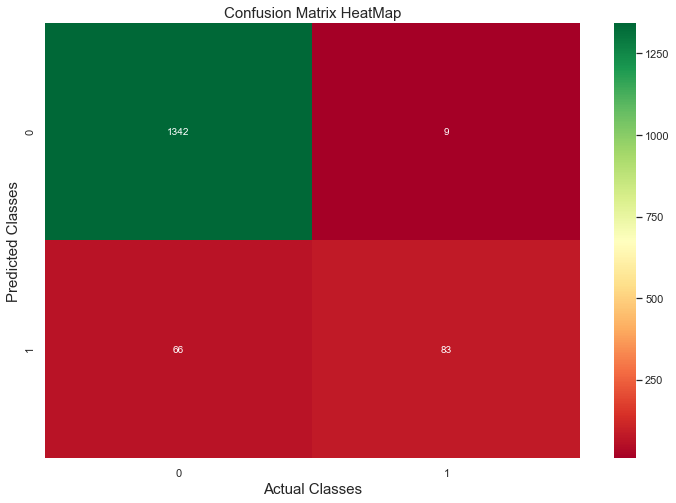

In [73]:
#visualization of confusion matrix in the form of a heatmap
y_predict_log = model.predict(x_test)
cm= confusion_matrix(y_test, y_predict_log)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15);

In [74]:
#Printing the classification report
print("Classification Report")
print(metrics.classification_report(y_test, test_predict_log, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.90      0.56      0.69       149
           0       0.95      0.99      0.97      1351

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.93      0.78      0.83      1500
weighted avg       0.95      0.95      0.94      1500



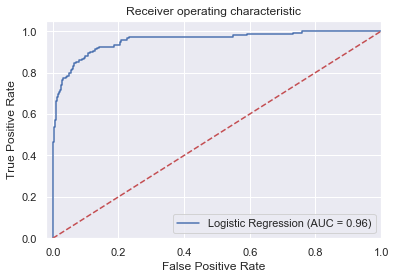

In [75]:
#Plotting ROC and AUC
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_log = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [76]:
precision_log, recall_log, f1_score_log, support = precision_recall_fscore_support(y_test, test_predict_log, average = 'macro')
print('Precision Score :', '%0.2f' % precision_log)
print('Recall Score :', '%0.2f' % recall_log)
print('F1-Score:', '%0.2f' % f1_score_log)
log_acc= accuracy_score(y_test, test_predict_log)
print('Accuracy Score :','%0.2f' % log_acc)
print('AUC :','%0.2f' % roc_auc_log)

Precision Score : 0.93
Recall Score : 0.78
F1-Score: 0.83
Accuracy Score : 0.95
AUC : 0.96


## K-Nearest Neighbours

In [128]:
#Preparing the data
tb=pd.read_csv("./Bank_Personal_Loan_Modelling.csv")
tb=tb.drop(["ID","ZIP Code","Experience"],axis=1)
tb['Family']= tb['Family'].astype('category')
tb['Education'] = tb['Education'].astype('category')
tb['Securities Account'] = tb['Securities Account'].astype('category')
tb['CD Account']=tb['CD Account'].astype('category')
tb['Online']=tb['Online'].astype('category')
tb['CreditCard']=tb['CreditCard'].astype('category')
tb['Personal Loan']=tb['Personal Loan'].astype('category')
tb['Mortgage_B'] = '-999'
tb.loc[(tb['Mortgage'] > 0), 'Mortgage_B'] = '1'
tb.loc[(tb['Mortgage'] == 0), 'Mortgage_B'] = '0'
tb=tb.drop(columns=['Mortgage'])
tb.rename(columns={'Mortgage_B':'Mortgage'}, inplace=True)
tb['Mortgage']=tb['Mortgage'].astype('category')

In [129]:
#creating dummy variable
tb= pd.get_dummies(tb, prefix='Education', columns=['Education'])
tb= pd.get_dummies(tb, prefix='Family', columns=['Family'])

In [130]:
tb.head()

,Age,Income,CCAvg,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
0,25,49,1.6,0,1,0,0,0,0,1,0,0,0,0,0,1
1,45,34,1.5,0,1,0,0,0,0,1,0,0,0,0,1,0
2,39,11,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,35,100,2.7,0,0,0,0,0,0,0,1,0,1,0,0,0
4,35,45,1.0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [131]:
#preparing the data for scaling
X = tb.drop(["Personal Loan","Securities Account","Mortgage","CD Account","Online","CreditCard","Education_1","Education_2","Education_3","Family_1","Family_2","Family_3","Family_4"] , axis = 1)
y=tb.iloc[:,3:16]

In [132]:
# convert all attributes to Z scale 
XScaled  = X.apply(zscore)  
XScaled.describe()

,Age,Income,CCAvg
count,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,1.939449e-16,-2.078338e-17
std,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-1.428969e+00,-1.108987e+00
25%,-9.019702e-01,-7.554825e-01,-7.084116e-01
50%,-2.952359e-02,-2.123482e-01,-2.506106e-01
75%,8.429230e-01,5.263146e-01,3.216407e-01
max,1.889859e+00,3.263712e+00,4.613525e+00


In [133]:
#combining the data
tb=pd.concat([XScaled,y],axis=1)

In [134]:
tb.head()

,Age,Income,CCAvg,Personal Loan,Securities Account,CD Account,Online,CreditCard,Mortgage,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
0,-1.774417,-0.538229,-0.193385,0,1,0,0,0,0,1,0,0,0,0,0,1
1,-0.029524,-0.864109,-0.250611,0,1,0,0,0,0,1,0,0,0,0,1,0
2,-0.552992,-1.363793,-0.536736,0,0,0,0,0,0,1,0,0,1,0,0,0
3,-0.901970,0.569765,0.436091,0,0,0,0,0,0,0,1,0,1,0,0,0
4,-0.901970,-0.625130,-0.536736,0,0,0,0,1,0,0,1,0,0,0,0,1


In [135]:
#data preparation
tb['Securities Account'] = tb['Securities Account'].astype('int')
tb['CD Account']=tb['CD Account'].astype('int')
tb['Online']=tb['Online'].astype('int')
tb['CreditCard']=tb['CreditCard'].astype('int')

In [136]:
#splitting the data in train and test 70:30
X = tb.drop('Personal Loan',axis=1)    
Y = tb['Personal Loan']  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [137]:
print("Training Positive Response    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Negative Response   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Positive Response        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Negative Response       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Training Positive Response    : 340 (9.71%)
Training Negative Response   : 3160 (90.29%)

Test Positive Response        : 140 (9.33%)
Test Negative Response       : 1360 (90.67%)



In [138]:
# creating odd list of K for KNN
myList = list(range(1, 16))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [139]:
# empty list that will hold accuracy scores
accuracy_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    # predict the response
    y_predictKNN = knn.predict(x_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_predictKNN)
    accuracy_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in accuracy_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is: ', optimal_k)

The optimal number of neighbors is:  3


In [140]:
#Running KNN with 3 neighbours
knn = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )

In [141]:
# Call Nearest Neighbour algorithm
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [142]:
#predicting on the train data
train_predict_knn = knn.predict(x_train)
knn.score(x_train, y_train)

print('Model Accuracy on train: ', knn.score(x_train, y_train))

Model Accuracy on train:  1.0


In [143]:
#predicting on the test data
test_predict_knn = knn.predict(x_test)
knn.score(x_test, y_test)
print('Model Accuracy on test: ', knn.score(x_test, y_test))

Model Accuracy on test:  0.9726666666666667


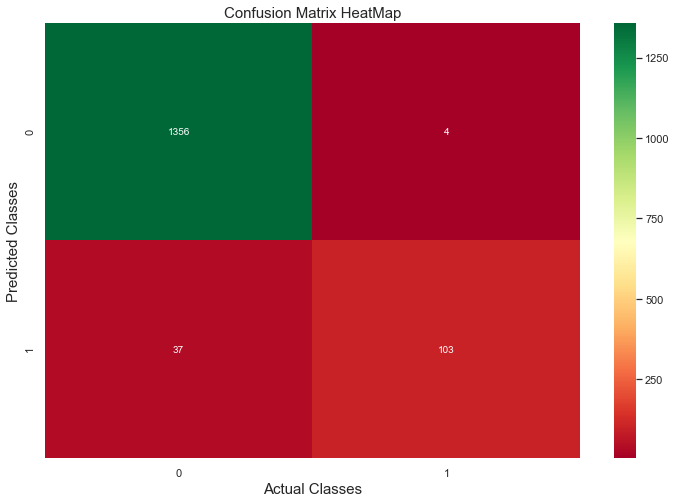

In [144]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_test, test_predict_knn)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15);

In [145]:
#Printing the classification report
print("Classification Report")
print(metrics.classification_report(y_test, test_predict_knn, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.96      0.74      0.83       140
           0       0.97      1.00      0.99      1360

   micro avg       0.97      0.97      0.97      1500
   macro avg       0.97      0.87      0.91      1500
weighted avg       0.97      0.97      0.97      1500



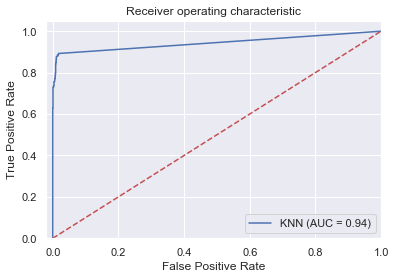

In [146]:
#plotting ROC and AUC
probs = knn.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_knn = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

In [147]:
precision_knn, recall_knn, f1_score_knn, support = precision_recall_fscore_support(y_test, test_predict_knn, average = 'macro')
print('Precision Score :', '%0.2f' % precision_knn)
print('Recall Score :', '%0.2f' % recall_knn)
print('F1-Score:', '%0.2f' % f1_score_knn)
knn_acc= accuracy_score(y_test, test_predict_knn)
print('Accuracy Score :','%0.2f' % knn_acc)
print('AUC :','%0.2f' % roc_auc_knn)

Precision Score : 0.97
Recall Score : 0.87
F1-Score: 0.91
Accuracy Score : 0.97
AUC : 0.94


## Gaussian Naive Bayes

In [97]:
#Loading the data
tb=pd.read_csv("./Bank_Personal_Loan_Modelling.csv")
tb=tb.drop(["ID","ZIP Code","Experience"],axis=1)

In [98]:
#preparing the data by biining the continous variable into categories
tb['Age_B'] = pd.qcut(tb['Age'], q=4)

In [99]:
tb['Age_B'].value_counts()

(22.999, 35.0]    1274
(45.0, 55.0]      1265
(35.0, 45.0]      1245
(55.0, 67.0]      1216
Name: Age_B, dtype: int64

In [100]:
#Binning Age
bins= ['1', '2','3', '4']
tb['Age_B'] = pd.qcut(tb['Age'],
                              q=4,
                              labels=bins)

In [101]:
#Binning Income
bins= ['1', '2','3', '4']
tb['Income_B'] = pd.qcut(tb['Income'],
                              q=4,
                              labels=bins)

In [102]:
#Coverting mortgage to binary level
tb['Mortgage_B'] = '-999'
tb.loc[(tb['Mortgage'] > 0), 'Mortgage_B'] = '1'
tb.loc[(tb['Mortgage'] == 0), 'Mortgage_B'] = '0'

In [103]:
#Binning CCAvg 
bins= ['1', '2','3', '4']
tb['CCAAvg_B'] = pd.qcut(tb['CCAvg'],
                              q=4,
                              labels=bins)

In [104]:
#Dropping the original variables
tb=tb.drop(["Age","Income","CCAvg","Mortgage"],axis=1)

In [105]:
#Coverting variable to categorical
tb['Securities Account'] = tb['Securities Account'].astype('category')
tb['CD Account']=tb['CD Account'].astype('category')
tb['Online']=tb['Online'].astype('category')
tb['Family']=tb['Family'].astype('category')
tb['Education']=tb['Education'].astype('category')
tb['CreditCard']=tb['CreditCard'].astype('category')
tb['Age_B']=tb['Age_B'].astype('category')
tb['Income_B']=tb['Income_B'].astype('category')
tb['Mortgage_B']=tb['Mortgage_B'].astype('category')
tb['CCAAvg_B']=tb['CCAAvg_B'].astype('category')
tb['Personal Loan']=tb['Personal Loan'].astype('category')

In [106]:
tb.dtypes

Family                category
Education             category
Personal Loan         category
Securities Account    category
CD Account            category
Online                category
CreditCard            category
Age_B                 category
Income_B              category
Mortgage_B            category
CCAAvg_B              category
dtype: object

In [107]:
#Splitting the data into train and test 70:30
X = tb.drop('Personal Loan',axis=1)    
Y = tb['Personal Loan']  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

In [108]:
print("Training Positive Response    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Negative Response   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Positive Response        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Negative Response       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Training Positive Response    : 339 (9.69%)
Training Negative Response   : 3161 (90.31%)

Test Positive Response        : 141 (9.40%)
Test Negative Response       : 1359 (90.60%)



In [109]:
# create the model
nbb = GaussianNB()

nbb.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [110]:
#Predicting on the train data
nb_train_predict = nbb.predict(x_train)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_train, nb_train_predict)))
print()

Model Accuracy on train: 0.9514



In [111]:
#Predicting on the test data
nb_test_predict = nbb.predict(x_test)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_test, nb_test_predict)))
print()

Model Accuracy on test: 0.9487



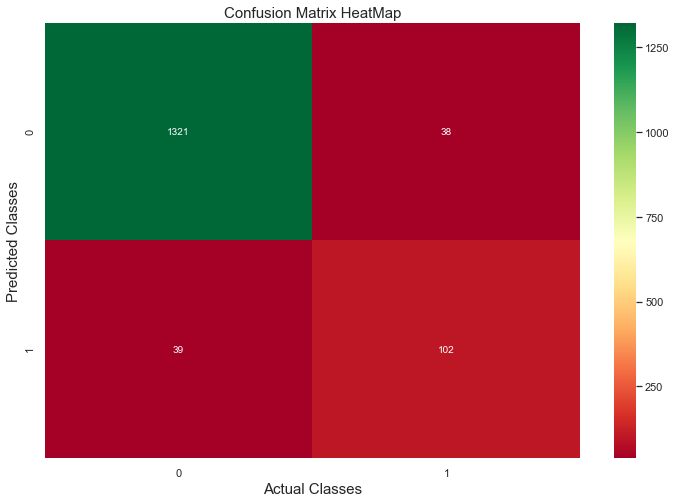

In [112]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_test, nb_test_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15);

In [113]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, nb_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.73      0.72      0.73       141
           0       0.97      0.97      0.97      1359

   micro avg       0.95      0.95      0.95      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.95      0.95      0.95      1500



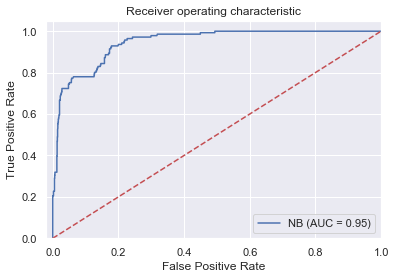

In [114]:
#plotting ROC and AUC
probs = nbb.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_nb = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='NB (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

In [115]:
precision_nb, recall_nb, f1_score_nb, support = precision_recall_fscore_support(y_test, nb_test_predict, average = 'macro')
print('Precision Score :', '%0.2f' % precision_nb)
print('Recall Score :', '%0.2f' % recall_nb)
print('F1-Score:', '%0.2f' % f1_score_nb)
nb_acc= accuracy_score(y_test, nb_test_predict)
print('Accuracy Score :','%0.2f' % nb_acc)
print('AUC :','%0.2f' % roc_auc_nb)

Precision Score : 0.85
Recall Score : 0.85
F1-Score: 0.85
Accuracy Score : 0.95
AUC : 0.95


## Support Vector Classifier

In [116]:
#Preparing the data
tb=pd.read_csv("./Bank_Personal_Loan_Modelling.csv")
tb=tb.drop(["ID","ZIP Code","Experience"],axis=1)
tb['Family']= tb['Family'].astype('category')
tb['Education'] = tb['Education'].astype('category')
tb['Securities Account'] = tb['Securities Account'].astype('category')
tb['CD Account']=tb['CD Account'].astype('category')
tb['Online']=tb['Online'].astype('category')
tb['CreditCard']=tb['CreditCard'].astype('category')
tb['Personal Loan']=tb['Personal Loan'].astype('category')
tb['Mortgage_B'] = '-999'
tb.loc[(tb['Mortgage'] > 0), 'Mortgage_B'] = '1'
tb.loc[(tb['Mortgage'] == 0), 'Mortgage_B'] = '0'
tb=tb.drop(columns=['Mortgage'])
tb.rename(columns={'Mortgage_B':'Mortgage'}, inplace=True)
tb['Mortgage']=tb['Mortgage'].astype('category')

In [117]:
#Creating dummy variable
tb= pd.get_dummies(tb, prefix='Education', columns=['Education'])
tb= pd.get_dummies(tb, prefix='Family', columns=['Family'])

In [118]:
#splitting the data into train and test 70:30
X = tb.drop('Personal Loan',axis=1)    
Y = tb['Personal Loan']  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=14)

In [119]:
print("Training Positive Response    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Negative Response   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Positive Response        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Negative Response       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Training Positive Response    : 343 (9.80%)
Training Negative Response   : 3157 (90.20%)

Test Positive Response        : 137 (9.13%)
Test Negative Response       : 1363 (90.87%)



In [120]:
# Building a Support Vector Machine on train data
svc_model = SVC(C= 3, kernel='linear', gamma= 1,probability=True)
svc_model.fit(x_train, y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [121]:
#predicting on train data
sv_train_predict = svc_model .predict(x_train)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_train, sv_train_predict)))
print()

Model Accuracy on train: 0.9640



In [122]:
#predicting on test data
sv_test_predict = svc_model .predict(x_test)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_test, sv_test_predict)))
print()

Model Accuracy on train: 0.9613



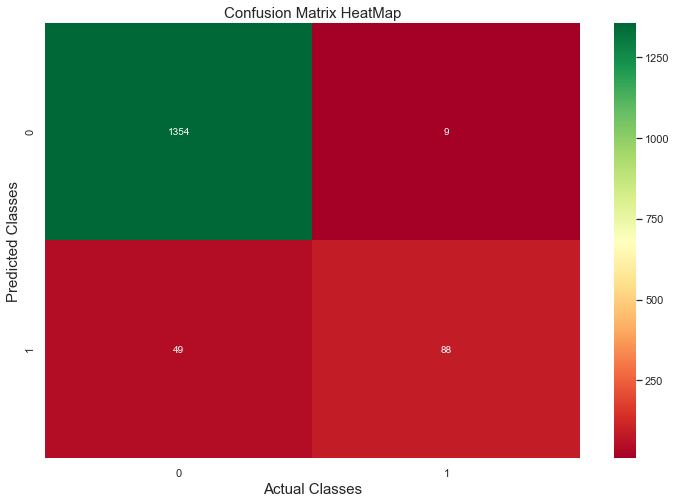

In [123]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_test, sv_test_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap', fontsize = 15);

In [124]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, sv_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.91      0.64      0.75       137
           0       0.97      0.99      0.98      1363

   micro avg       0.96      0.96      0.96      1500
   macro avg       0.94      0.82      0.87      1500
weighted avg       0.96      0.96      0.96      1500



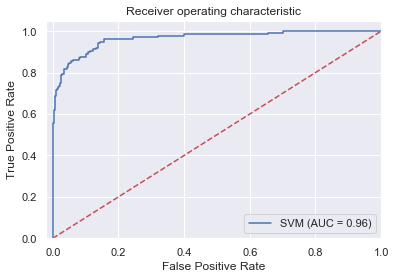

In [125]:
#plotting ROC and AUC
probs = svc_model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc_svc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, label='SVM (AUC = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

In [126]:
precision_SV, recall_SV, f1_score_SV, support = precision_recall_fscore_support(y_test, sv_test_predict,average='macro')
print('Precision Score :', '%0.2f' % precision_SV)
print('Recall Score :', '%0.2f' % recall_SV)
print('F1-Score:', '%0.2f' % f1_score_SV)
SV_Acc= accuracy_score(y_test, sv_test_predict)
print('Accuracy Score :','%0.2f' % SV_Acc)
print('AUC :','%0.2f' % roc_auc_svc)

Precision Score : 0.94
Recall Score : 0.82
F1-Score: 0.87
Accuracy Score : 0.96
AUC : 0.96


## Result Dataframe

In [127]:
modellists = []
modellists.append(['Logistic Regression',log_acc  * 100, recall_log * 100, precision_log * 100,roc_auc_log*100])
modellists.append(['K-Nearest Neighbour', knn_acc * 100, recall_knn * 100, precision_knn * 100,roc_auc_knn*100])
modellists.append(['Gaussian Naive Bayes', nb_acc * 100, recall_nb * 100, precision_nb * 100,roc_auc_nb*100])
modellists.append(['Support Vector Classifier', SV_Acc * 100, recall_SV * 100, precision_SV * 100,roc_auc_svc*100])
model_df = pd.DataFrame(modellists, columns = ['Model', 'Accuracy Score', 'Recall Score', 'Precision Score','AUC'])
model_df

,Model,Accuracy Score,Recall Score,Precision Score,AUC
0,Logistic Regression,95.000000,77.519262,92.764946,95.581697
1,K-Nearest Neighbour,97.266667,86.638655,96.802772,94.379202
2,Gaussian Naive Bayes,94.866667,84.772126,84.994748,94.649278
3,Support Vector Classifier,96.133333,81.786634,93.614567,96.468717


Support vector classfier is better model when compared with AUC, but since the the purpose of the case study is for a loan campaign it would be important for the model to have high senstivity/Recall, hence would go with KNN for prduction purpose but would still need to have it consulted with a domain expert.

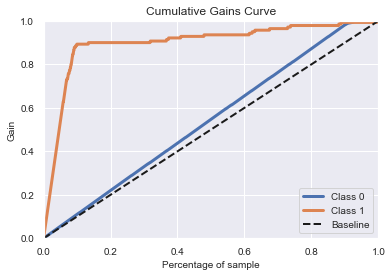

In [148]:
#Gain Chart for KNN(re-run KNN)
knn_probs=knn.predict_proba(x_test)
skplt.metrics.plot_cumulative_gain(y_test,knn_probs);

Target the 20% of the observations, the model will ensure that approx. 95% of the positive repondants in total are in this group, while the random pick would provide only the 20% of the targets.

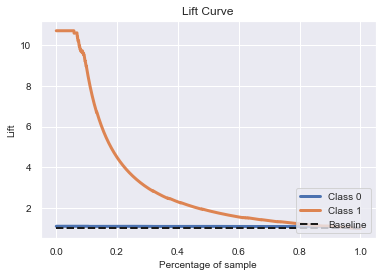

In [149]:
#Lift Chart for KNN
skplt.metrics.plot_lift_curve(y_test, knn_probs);

The model allows addressing four times more targets in the 20% of observations, compared with addressing without the model, that is randomly.

### Insights:
a) Income seems to be significantly different for customer who have reponsed in the previous campaing and customer with income > 75+ are potential targets. <br/>
b) Customers with family size >=3 are potential targets. <br/>
c) Customers who are graduates/Advanced professionals are potential targets. <br/>
d) Customers without a Credit Card provided by the bank, without a CD account, Securities Account and Mortgage are potential targets. <br/>
e) Customers having access to online banking are potential targets. <br/>
f) Age,credit card, and family size of 2 have a negative impact towards logodds ratio of positive response. <br/>